
# BIOINFORMATIKA - TSP – Genetikus algoritmus
**Feladat:** Traveling Salesman Problem (TSP)  

*   **Reprezentáció:** permutáció (városok sorrendje)
*   **Fitness:** –úthossz (mert a GA maximál, mi minimalizálnánk)


**GA-lépések:**
*  Szelekció: tournament
*  Keresztezés: OX/PMX
*  Mutáció swap/inversion
*  Visszahelyezés: generációs + elitizmus

**Grafikonok:**
* tanulási görbe (legjobb és átlag út hossza generációnként),
* a legjobb útvonal rajza (városok pontként, kör útvonallal).


Gyakorló feladatok


## FELADAT (könnyű) - Távolságmátrix és útvonalhossz

Írj egy függvényt, amely:

bemenet:
* coords: lista (vagy NumPy tömb) városokkal, pl. [(x1, y1), (x2, y2), ...]

kimenet:
* dist_matrix: kétdimenziós lista vagy NumPy tömb, ahol dist_matrix[i][j] az i. és j. város távolsága (euklideszi)

In [1]:
import numpy as np

def tour_length(tour, dist_matrix):
    """
    tour: pl. [0, 3, 1, 2, 4] – városindex-permutáció
    dist_matrix: NxN távolságmátrix
    Vissza: körút teljes hossza (visszatérés az első városba is).
    """
    total_length = 0
    num_cities = len(tour)
    for i in range(num_cities):
        city1_idx = tour[i]
        city2_idx = tour[(i + 1) % num_cities]
        total_length += dist_matrix[city1_idx][city2_idx]
    return total_length

In [2]:
import math

def calculate_distance_matrix(coords):
    """
    bemenet:
    * coords - koordináták listája, pl. [(x1, y1), (x2, y2), ...]

    kimenet:
    * dist_matrix - tavolsagmatrix NxN, ahol dist_matrix[i][j] az i. es j. varos kozotti tavolsag
    """
    num_cities = len(coords)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i == j:
                dist_matrix[i][j] = 0
            else:
                x1, y1 = coords[i]
                x2, y2 = coords[j]
                dist_matrix[i][j] = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist_matrix

cities_coords = [(0, 0), (1, 1), (0, 1), (1, 0)]
dm = calculate_distance_matrix(cities_coords)
print("Távolságmátrix:\n", dm)

tour_example = [0, 2, 1, 3]
length = tour_length(tour_example, dm)
print(f"\nAz útvonal hossza ({tour_example}): {length:.2f}")

tour_example_2 = [0, 1, 2, 3]
length_2 = tour_length(tour_example_2, dm)
print(f"Az útvonal hossza ({tour_example_2}): {length_2:.2f}")

Távolságmátrix:
 [[0.         1.41421356 1.         1.        ]
 [1.41421356 0.         1.         1.        ]
 [1.         1.         0.         1.41421356]
 [1.         1.         1.41421356 0.        ]]

Az útvonal hossza ([0, 2, 1, 3]): 4.00
Az útvonal hossza ([0, 1, 2, 3]): 4.83


## FELADAT (könnyű) - Véletlen permutáció és swap mutáció

Írj két függvényt:
* random_tour(n)
* swap_mutation(tour)

*   List item
*   List item



majd

Futtasd le a swap_mutation-t néhányszor, és ellenőrizd, hogy:
* a permutáció hossza nem változik
* minden város továbbra is pontosan egyszer szerepel

In [6]:
import random

def random_tour(n):
    """Adjon vissza egy véletlen permutációt 0..n-1 között."""
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def swap_mutation(tour):
    """
    Válassz ki véletlenszerűen két pozíciót a tour-ban és cseréld meg őket.
    Visszatér: új (mutált) tour.
    """
    mutated_tour = list(tour)
    idx1, idx2 = random.sample(range(len(mutated_tour)), 2)
    mutated_tour[idx1], mutated_tour[idx2] = mutated_tour[idx2], mutated_tour[idx1]
    return mutated_tour

num_cities = 5
original_tour = random_tour(num_cities)
print(f"Eredeti túra: {original_tour}")

print("\nSwap mutáció tesztelése:")
for _ in range(3):
    mutated_tour = swap_mutation(original_tour)
    print(f"  Mutált túra: {mutated_tour}")
    print(f"    Hossz változatlan: {len(original_tour) == len(mutated_tour)}")
    print(f"    Minden város egyszer szerepel: {sorted(mutated_tour) == list(range(num_cities))}")

Eredeti túra: [0, 1, 3, 4, 2]

Swap mutáció tesztelése:
  Mutált túra: [0, 3, 1, 4, 2]
    Hossz változatlan: True
    Minden város egyszer szerepel: True
  Mutált túra: [1, 0, 3, 4, 2]
    Hossz változatlan: True
    Minden város egyszer szerepel: True
  Mutált túra: [4, 1, 3, 0, 2]
    Hossz változatlan: True
    Minden város egyszer szerepel: True


## FELADAT (könnyű) - Inversion mutáció

Írj egy inversion_mutation függvényt:
* inversion_mutation(tour)

majd

Teszteld:
* rajzold ki (akár textben) az eredeti és mutált tour-t
* számold ki a tour hosszát mutáció előtt/után ugyanazzal a dist_matrix-szel

In [11]:
import random
import numpy as np
import math

def inversion_mutation(tour):
    """
    Válassz ki két indexet i < j.
    Fordítsd meg a tour i..j közti szakaszát.
    Példa: [0, 1, 2, 3, 4, 5], i=1, j=4 → [0, 4, 3, 2, 1, 5]
    """
    mutated_tour = list(tour)
    if len(mutated_tour) < 2:
        return mutated_tour

    idx1, idx2 = sorted(random.sample(range(len(mutated_tour)), 2))

    mutated_tour[idx1 : idx2 + 1] = mutated_tour[idx1 : idx2 + 1][::-1]
    return mutated_tour

cities_coords = [(0, 0), (1, 1), (0, 1), (1, 0), (2, 2)]
dist_matrix = calculate_distance_matrix(cities_coords)

original_tour = [0, 1, 2, 3, 4]
print(f"Eredeti túra: {original_tour}")
original_length = tour_length(original_tour, dist_matrix)
print(f"Eredeti túra hossza: {original_length:.2f}")

mutated_tour = inversion_mutation(original_tour)
print(f"Mutált túra (inversion): {mutated_tour}")
mutated_length = tour_length(mutated_tour, dist_matrix)
print(f"Mutált túra hossza (inversion): {mutated_length:.2f}")


Eredeti túra: [0, 1, 2, 3, 4]
Eredeti túra hossza: 8.89
Mutált túra (inversion): [0, 3, 2, 1, 4]
Mutált túra hossza (inversion): 7.66


## FELADAT (Közepes) - GA inicializáció és egyszerű futtatás

Készíts:
* init_population(pop_size, n_cities)
* fitness(tour, dist_matrix)

Majd

Majd futtass egy nagyon egyszerű GA-t:
* populáció generálása
* minden generációban:
  * csak mutáció (swap vagy inversion), pl. minden egyedet kis valószínűséggel
  * új populáció értékelése
* futtass 50–100 generációt
* rajzold ki: generációnkénti legjobb tour hossz (vagy fitness)

In [ ]:
def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    ...

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    ...



Legjobb útvonal a GA végén: [4, 15, 0, 16, 3, 5, 19, 2, 13, 11, 10, 6, 9, 7, 1, 12, 18, 8, 14, 17]
Legjobb útvonal hossza: 663.82


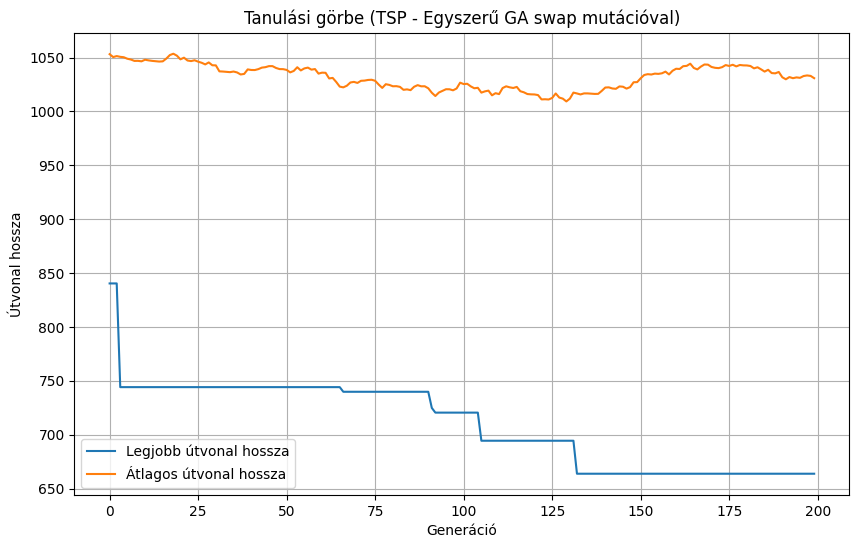

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random

def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    population = []
    for _ in range(pop_size):
        population.append(list(random.sample(range(n_cities), n_cities)))
    return population

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    return -tour_length(tour, dist_matrix)

# generáljunk több várost
n_cities = 20
np.random.seed(42)
new_cities_coords = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(n_cities)]
cities_coords = new_cities_coords

pop_size = 100
n_generations = 200
mutation_rate = 0.1

dist_matrix = calculate_distance_matrix(cities_coords)

population = init_population(pop_size, n_cities)

best_lengths = []
average_lengths = []

for gen in range(n_generations):

    fitness_scores = [fitness(tour, dist_matrix) for tour in population]

    best_fitness_idx = np.argmax(fitness_scores)
    current_best_tour = population[best_fitness_idx]
    current_best_length = tour_length(current_best_tour, dist_matrix)
    best_lengths.append(current_best_length)

    average_lengths.append(-np.mean(fitness_scores))

    new_population = []
    for tour in population:
        if random.random() < mutation_rate:
            mutated_tour = swap_mutation(tour)
            new_population.append(mutated_tour)
        else:
            new_population.append(tour)

    if current_best_tour not in new_population:
        worst_fitness_idx = np.argmin([fitness(t, dist_matrix) for t in new_population])
        new_population[worst_fitness_idx] = current_best_tour

    population = new_population

print(f"\nLegjobb útvonal a GA végén: {current_best_tour}")
print(f"Legjobb útvonal hossza: {current_best_length:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(best_lengths, label='Legjobb útvonal hossza')
plt.plot(average_lengths, label='Átlagos útvonal hossza')
plt.title('Tanulási görbe (TSP - Egyszerű GA swap mutációval)')
plt.xlabel('Generáció')
plt.ylabel('Útvonal hossza')
plt.legend()
plt.grid(True)
plt.show()

## FELADAT (Közepes) - Crossover egyedekre (OX/PMX)

Implementálj egy TSP-kompatibilis keresztezőt (pl. OX vagy PMX):
* ox_crossover(parent1, parent2)

Feladatok:
* generálj 2 szülőt
* készíts 2 utódot
* ellenőrizd, hogy mindkét utód érvényes permutáció (minden város egyszer szerepel)
* mérd a szülők és utódok tour hosszát, írd ki összehasonlításként

Segits megoldani a feladatot a gyakorlo feladatok kozul aminek a cime: FELADAT (Közepes) - GA inicializáció és egyszerű futtatás. Fontos az hogy hasznaljuk az adatokat amik a notebook elejen vannak a feladat megoldasahoz, nem szukseges olyan fuggvenyeket amik mar az elobbiekben definialva voltak ulyra irni oket csak hasznalni, valamint megoldani a feladatot aszerint amit a szovege ker es a fuggvenyeket amik definialva vannak kiegesziteni: def init_population(pop_size, n_cities): """pop_size darab véletlen permutációból álló kezdeti populáció.""" ... def fitness(tour, dist_matrix): """Lehet pl. -tour_length (minimálásból max-olás)."""

In [18]:
def ox_crossover(parent1, parent2):
    """Order Crossover (OX) TSP permutációkra."""
    ...


## FELADAT (Közepes) - Swap vs. Inversion – összehasonlító kísérlet

Készíts kódot, amely:
* ugyanazzal a GA-val (populációméret, generációszám, szelekció, crossover)
* két külön futtatást végez:
   * (a) csak swap_mutation
   * (b) csak inversion_mutation
* minden esetben többször (pl. 10–20 run) lefuttatod
* összehasonlítod:
   * átlagos legjobb tour hossz
   * szórás

Írj rövid következtetést:
* Melyik mutáció „stabilabb”?
* Van-e különbség a konvergencia sebességében?

# FELADAT (Nehéz) - érzékenységi vizsgálat és hibrid mutáció

Készíts olyan GA-t, amely:
* egyszerre használ swap + inversion mutációt: pl. minden mutáció-lépésnél:
   * 50% eséllyel swap_mutation
   * 50% eséllyel inversion_mutation

Feladatok:
1. **Válaszd ki a paramétereket:**
  * populációméret
  * mutációs ráta
  * generációk száma

2. **Használj legalább 20 városból álló TSP példát**.
3. **Készíts kísérleti tervet három mutációs stratégiára**:
  * csak swap
  * csak inversion
  * kevert swap+inversion
4. **Minden konfigurációt futtasd le legalább 20x**.
5. **Gyűjtsd ki**:
  * átlagos legjobb tour hossz
  * legjobb elért tour
  * konvergenciagörbéket (átlagolt fitness / generáció)
6. **Írj rövid rövid elemzést**:
  * melyik stratégia adott jobb eredményt
  *  hogyan hat a mutáció típusa a keresés jellegére (finomhangolás vs. nagy ugrások)